Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



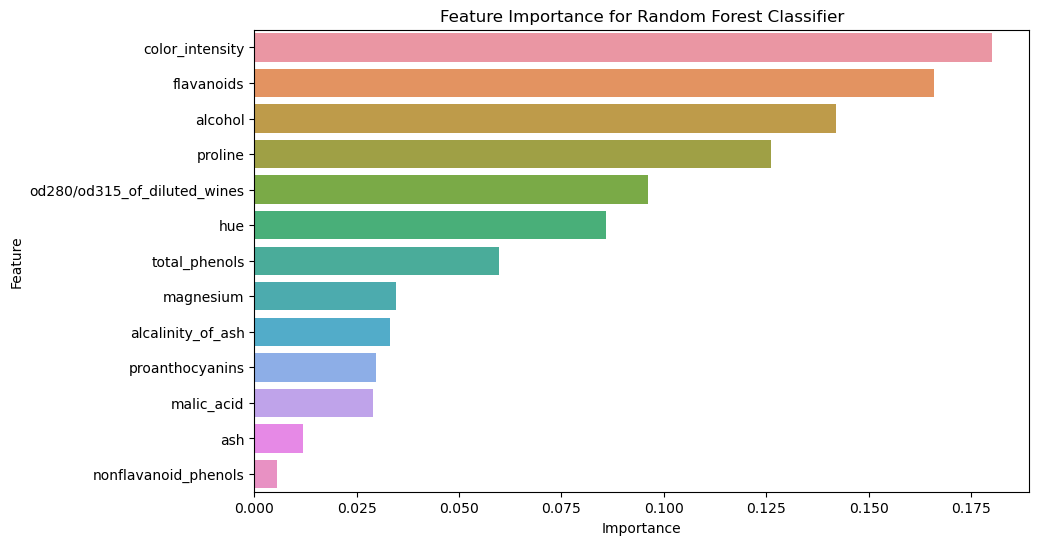

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_wine
import seaborn as sns

# Load the wine quality dataset (you can also load from CSV if you have a local file)
wine_data = load_wine()
X = wine_data.data  # Features (wine chemical attributes)
y = wine_data.target  # Target (wine quality)

# Convert the wine quality target to a categorical variable
# Since RandomForestClassifier requires categorical data, we are going to treat the target as a classification problem.
# (The dataset already has target as a categorical variable with values from 0 to 2, representing low, medium, and high quality wines)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance Visualization
feature_importances = rf.feature_importances_
features = wine_data.feature_names

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

